In [6]:
import math, sys, os
import numpy as np
import scipy.linalg as cp
from  matplotlib import pyplot as plt
from numba import njit

In [7]:
@njit
def jacobiHE2D(U, alpha, N, T):
    #r = 1./(1.+4.*alpha)
    r = 1.-4.*alpha
    Utemp = U.copy() # Reference matrix
    for yy in range(1,N): # Iterate over the whole mesh
        for xx in range(1,N):
            #U[xx,yy] = r*(alpha*(Utemp[xx,yy+1]+Utemp[xx,yy-1]+Utemp[xx+1,yy]+Utemp[xx-1,yy])+Utemp[xx,yy])
            U[xx,yy] = r*Utemp[xx,yy]+alpha*(Utemp[xx,yy+1]+Utemp[xx,yy-1]+Utemp[xx+1,yy]+Utemp[xx-1,yy])
    return U

def v2d(x,y,t,n):
    Bn = (-16*math.sin(math.pi*n/2))/(math.pi*n)**2
    serie = math.sin(n*math.pi*x)*math.sin(n*math.pi*y)*math.exp(-t*2*(n*math.pi)**2)
    return Bn*serie

#@njit()
def aprox(L,t,sol2d,nx):
    for xx in range(101):
        for yy in range(101):
            for nn in range(1,nx):
#                for mm in range(1,nx):
                sol2d[xx,yy] += v2d(L[xx], L[yy], t, nn)
            sol2d[xx,yy] += 1
    return sol2d
    

0.25
dt= 2.5e-05
Number of iterations to reach T_max = 0.11 :  4401


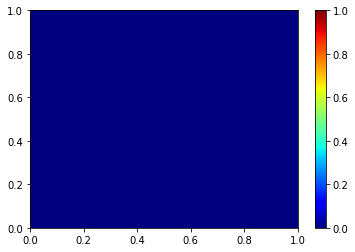

In [9]:
N = 100 # Square mesh size
x,dx = np.linspace(0,1,N+1,retstep=True)
y = x.copy() #Square mesh

dt = 0.25*dx**2
Tmax = 0.11
T = int(Tmax/dt)+1 #Target max time

alpha = dt/dx**2

#Initialize Mesh
U = np.zeros((N+1,N+1))

#Solution comparison
cU = np.zeros((N+1,N+1,2))
aU = cU.copy()
nx = 100

aU[:,:,0]= aprox(x,0.05,aU[:,:,0],nx)
aU[:,:,1]= aprox(x,0.1,aU[:,:,1],nx)

#Saving initial plot
fig, ax = plt.subplots()
im = ax.pcolormesh(x,y,U,cmap='jet',vmin=0., vmax=1.)
cbar = fig.colorbar(im)
#plt.title("T = 0")
#plt.savefig("2d250"+".png", format='png')

# Set Boundary conditions
U[:,0]  = 1.
U[:,-1] = 1.
U[0,:]  = 1.
U[-1,:] = 1.
print(alpha)
print("dt=", dt)
print("Number of iterations to reach T_max =",Tmax,": ", T)

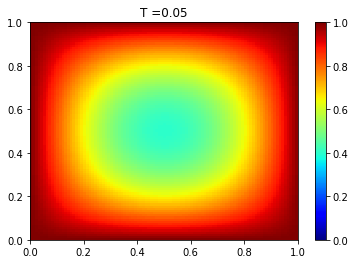

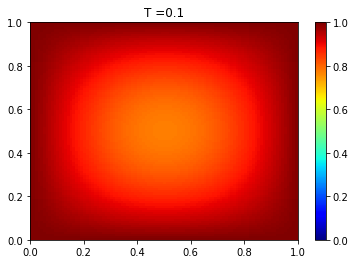

In [10]:
img = 0
for tt in range(1,T+1):
    U = jacobiHE2D(U, alpha, N, T)
    #if tt%250==0:
    if tt*dt == 0.1 or tt*dt==0.05:
        cU[:,:,img] = U.copy()
        # Start plotting
        fig, ax = plt.subplots()
        im = ax.pcolormesh(x,y,U,cmap='jet',vmin=0., vmax=1.)
        cbar = fig.colorbar(im)
        plt.title("T ="+str(dt*tt))
        plt.savefig("comp"+str(img)+".pdf", format='pdf')
        del fig,ax,im,cbar # Liberate Memory
        img += 1

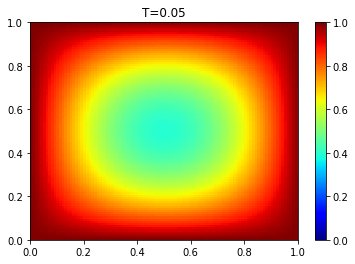

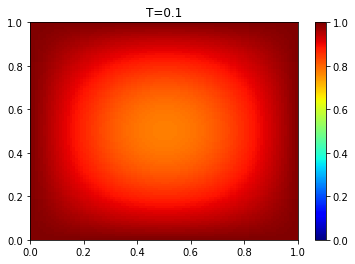

In [11]:
# Plot analytic solutions
v = ["T=0.05", "T=0.1"]
for ii in range(2):
    fig, ax = plt.subplots()
    im = ax.pcolormesh(x,y,aU[:,:,ii],cmap='jet',vmin=0., vmax=1.)
    cbar = fig.colorbar(im)
    plt.title(v[ii])
    plt.savefig("aly"+str(ii)+".pdf", format='pdf')
    del fig,ax,im,cbar # Liberate Memory
    
    

In [13]:
rERR = abs((aU -cU)/aU)*100

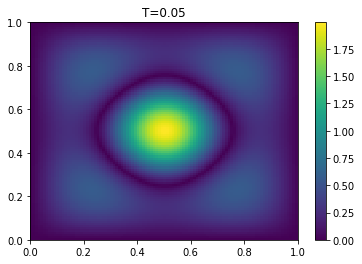

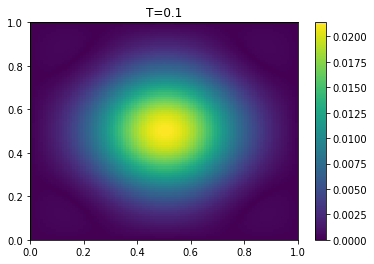

In [18]:
v = ["T=0.05", "T=0.1"]
for ii in range(2):
    fig, ax = plt.subplots()
    im = ax.pcolormesh(x,y,rERR[:,:,ii],rasterized=True)
    cbar = fig.colorbar(im)
    plt.title(v[ii])
    plt.savefig("rer"+str(ii)+".pdf", format='pdf')
    del fig,ax,im,cbar # Liberate Memory